In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# data 불러오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [ ]:
col_name = list(cancer.feature_names) # 열 이름 
col_name.append('target') # 'target'열 하나 추가
col_name

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'target']

In [ ]:
# np.c_ : 두 개의 배열을 하나로 합치기
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_name) # 열 이름 col_name
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
# target 변수 에 있는 
# cancer.target_names
df.describe()
# SVM은 편차가 큰 데이터에 취약

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
df.columns # mean(평균), error(표준 오차), worst(각 특성별 가장 큰 3개 값의 평균)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

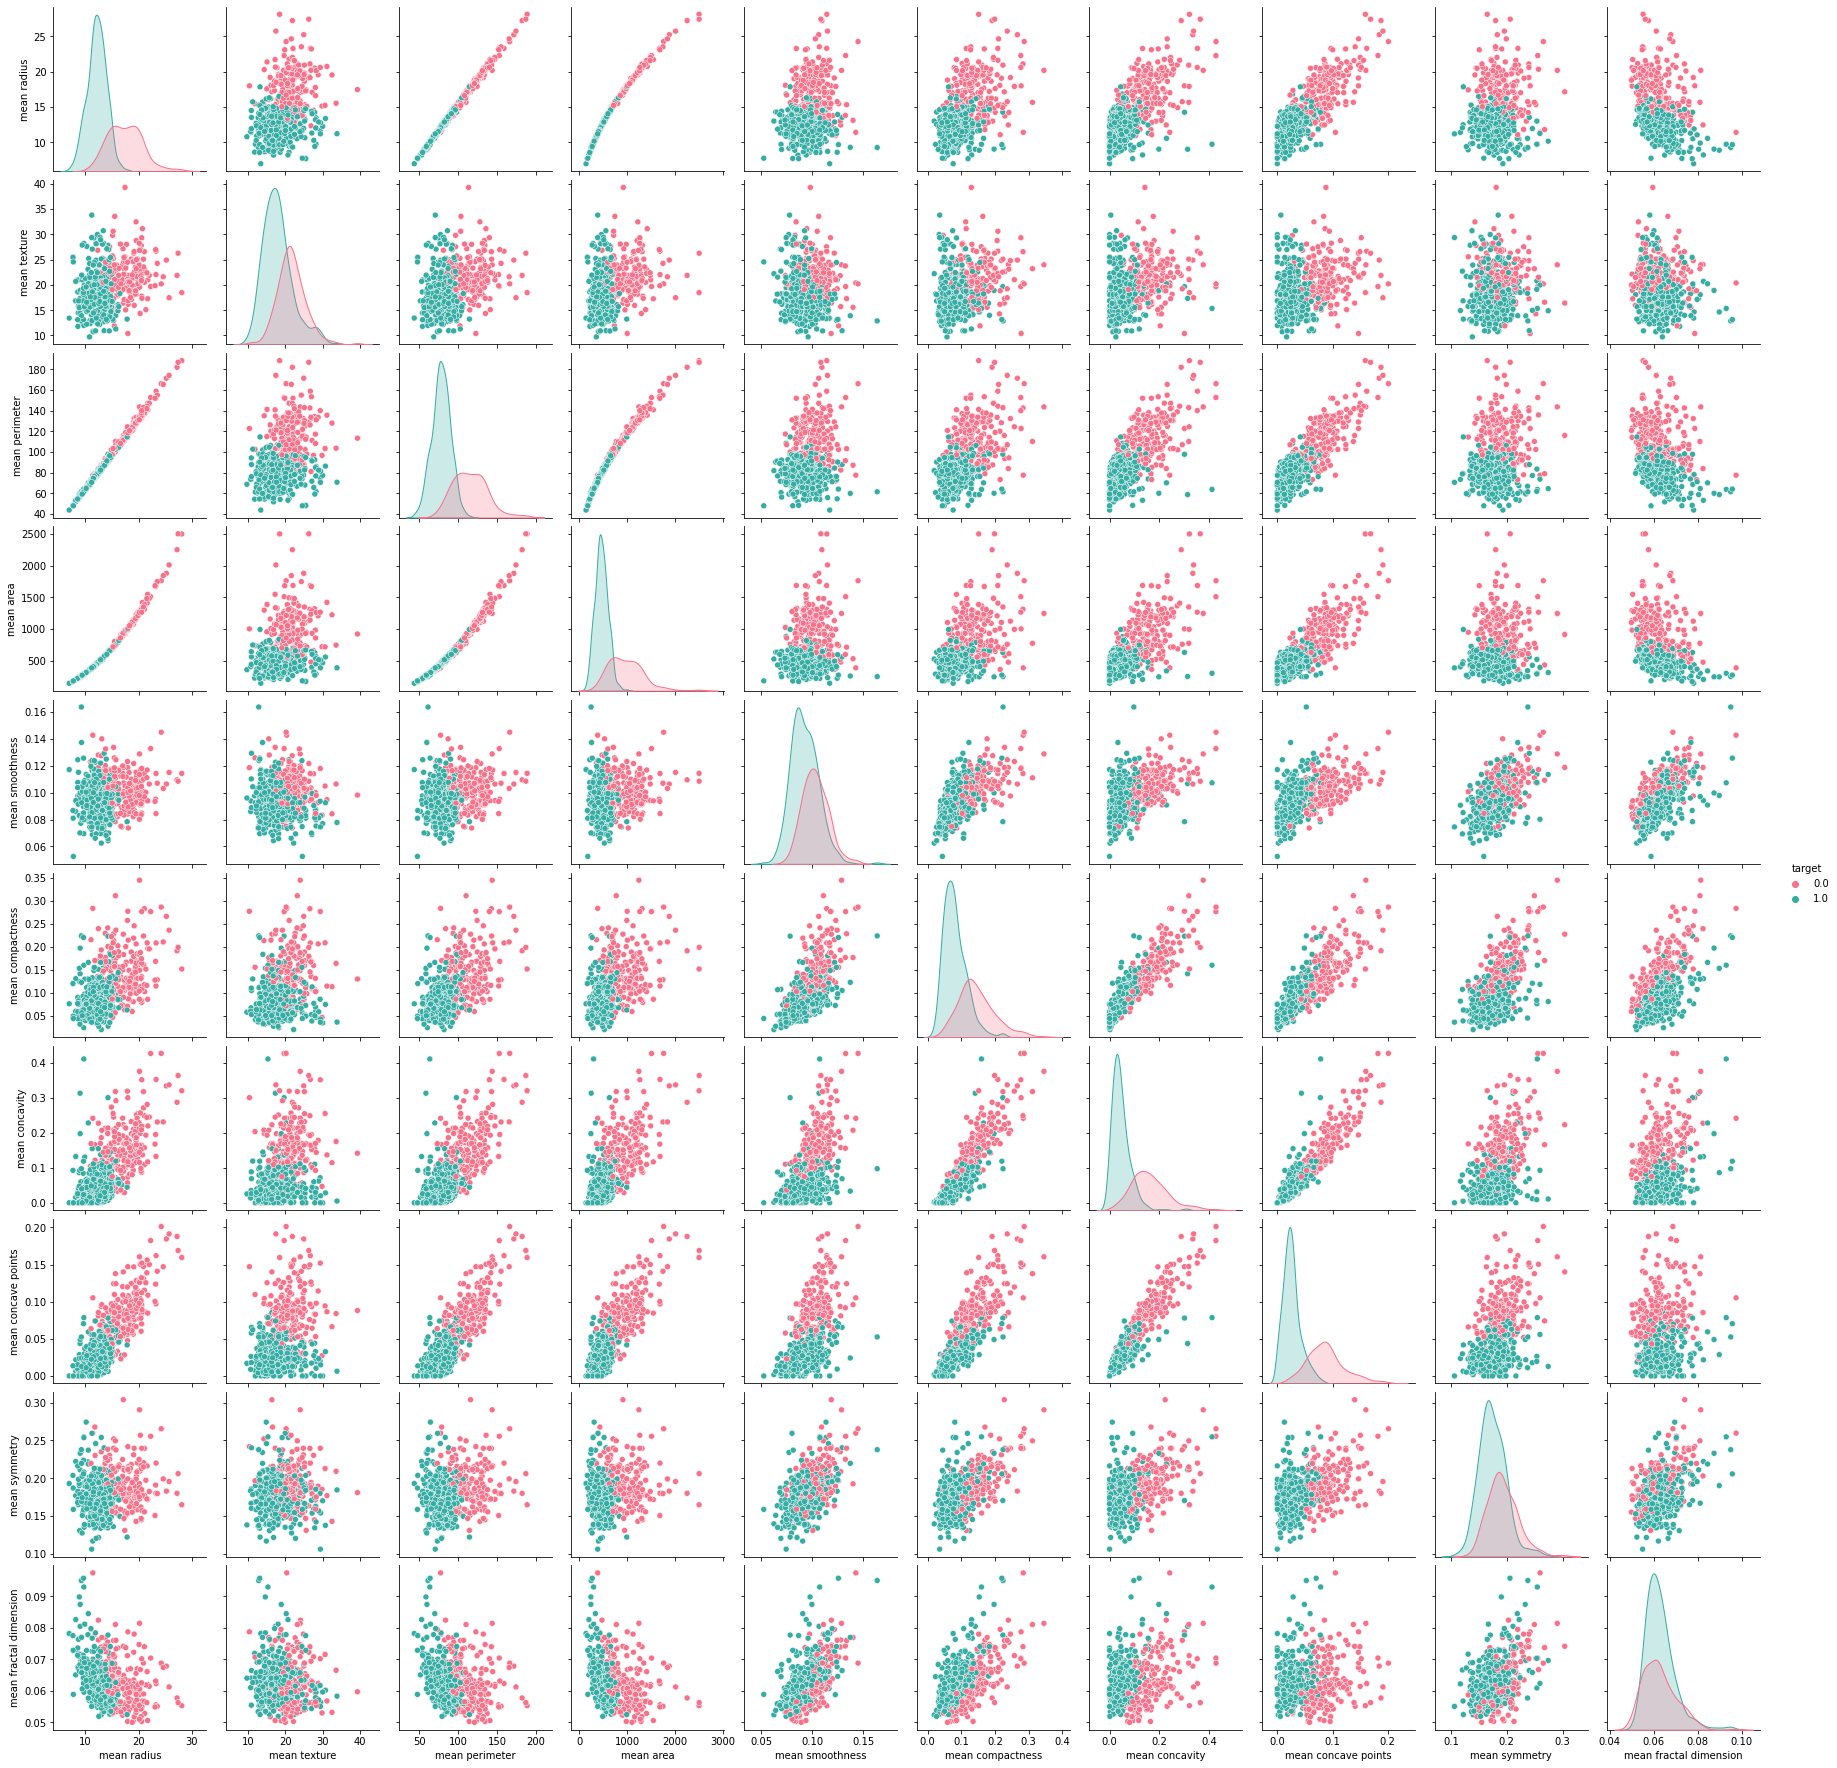

In [ ]:
# mean 변수로 pairplot 만들기
#     pairplot : data에 들어있는 각각의 열 (column)들의 모든 상관관게를 출력
sns.pairplot(df,hue='target', palette='husl',
             vars=['mean radius','mean texture','mean perimeter','mean area',
                   'mean smoothness','mean compactness','mean concavity',
                   'mean concave points','mean symmetry','mean fractal dimension'])

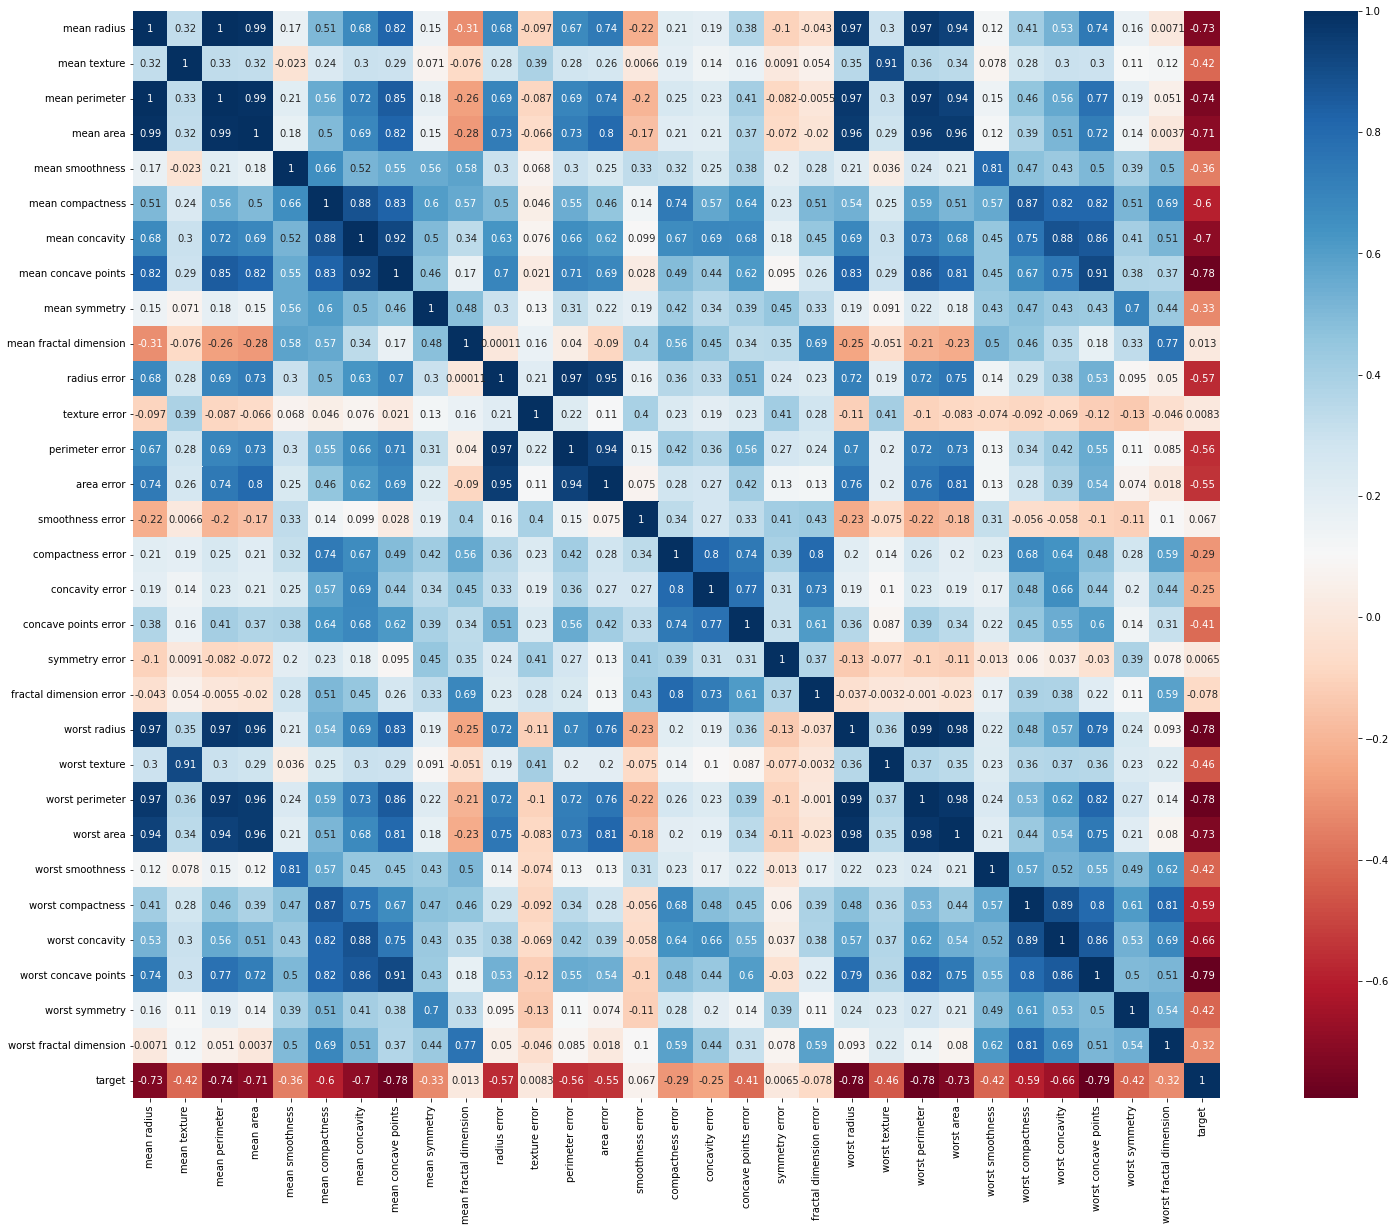

In [ ]:
# heatmap
#   데이터들의 배열을 색상으로 표현한 것 
#   두 카테고리간의 값의 변화를 한눈에 알 수 있음
#   대용량 데이터를 한눈에 확인할 때 사용
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, square=True, cmap='RdBu')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('target',axis=1)
y = df.target

x
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=100)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


In [ ]:
# Linear Kernal SVM
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
m = LinearSVC(loss='hinge',dual=True)
# loss : 손실함수 (hinge, squared_hinge) => hinge가 더 많이 사용됨, default값은 squared_hinge
m.fit(x_train, y_train) # 학습 시키기


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(loss='hinge')

In [ ]:
# 예측 
y_predict = m.predict(x_test)
confusion_matrix(y_test, y_predict)
# confusion_matrix : 오차행렬 => 예측 모델 완성 후에 이 모델이 얼마나 정확한지에 대한 평가를 내리는 것 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


array([[ 53,  16],
       [  0, 102]])

In [ ]:
# 정확도
accuracy_score(y_test, y_predict)

0.9064327485380117

In [ ]:
m2 = svm.SVC(kernel='linear')

m2.fit(x_train, y_train) # 학습

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


SVC(kernel='linear')

In [ ]:
# 예측되는 값
y_predict2 = m2.predict(x_test)
# 오차행렬
confusion_matrix(y_test, y_predict2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


array([[64,  5],
       [ 3, 99]])

In [ ]:
# 정확도
accuracy_score(y_test, y_predict2) # 위에 정확도보다 높음 ! 

0.9532163742690059

In [ ]:
# ------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.

In [ ]:
# 양성(악성) / 양성
cancer.target_names
malignant = cancer.data[cancer.target==0] # 악성
benign = cancer.data[cancer.target == 1] # 양성

malignant.shape, benign.shape

((212, 30), (357, 30))

In [ ]:
# 분리
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

# 학습
m = SVC().fit(x_train, y_train)

# 모델 평가
trainScore = m.score(x_train, y_train)
testScore = m.score(x_test, y_test)

# 이 모델에 대해서 얼마나 정확한지
print(trainScore, testScore)

0.9107981220657277 0.951048951048951


In [ ]:
# 예측
predict = m.predict(x_test)
predict

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

Text(0, 0.5, 'scale')

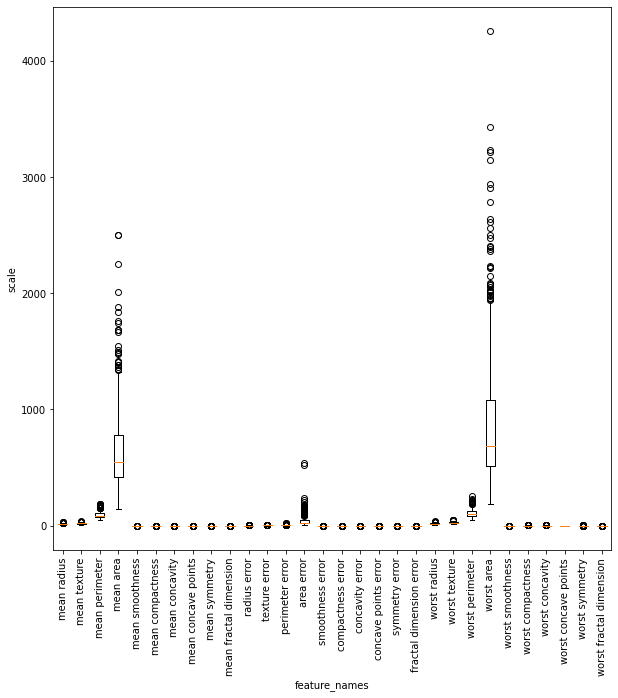

In [ ]:
# 그래프 그리기
fig = plt.figure(figsize=[10,10])
plt.boxplot(cancer.data)
plt.xticks(np.arange(30)+1, cancer.feature_names, rotation=90)
plt.xlabel('feature_names')
plt.ylabel('scale')

# BoxPlot - 기초 통계량을 한눈에 볼 수 있다는 장점
# 그래프 선의 제일 아래 - : 최소값
# 박스 기준 제일 아래 - 1사분위(25%)
# 박스 안의 주황색 선 - 2사분위(중앙값,50%)
# 박스 기준 제일 위 - 3사분위(75%)
# 그래프 선의 제일 위 - : 최대값
# 나머지 O 동그라미 - 이상치(비정상적으로 극단적인 값을 갖는 경우) 

Kernel SVM은 scale에 상당히 민감

Kernel SVM은 반드시 적용 전에 정규화(Normalization)이 꼭 필요함

0과 1사이의 값을 균등하게 조정해서 넣기

평균 0과 표준편차 1의 정규분포로 변환하는 방법

In [ ]:
# 0과 1사이에 값을 균등하게 조정해서 넣기

xMax = x_train.max(axis=0)
xMin = x_train.min(axis=0)
xMax, xMin
# 정규화 식 = (측정값 - 최소값) / (최대값 - 최소값)

x_train_sik = (x_train - xMin) / (xMax - xMin)
x_test_sik = (x_test - xMin) / (xMax - xMin)

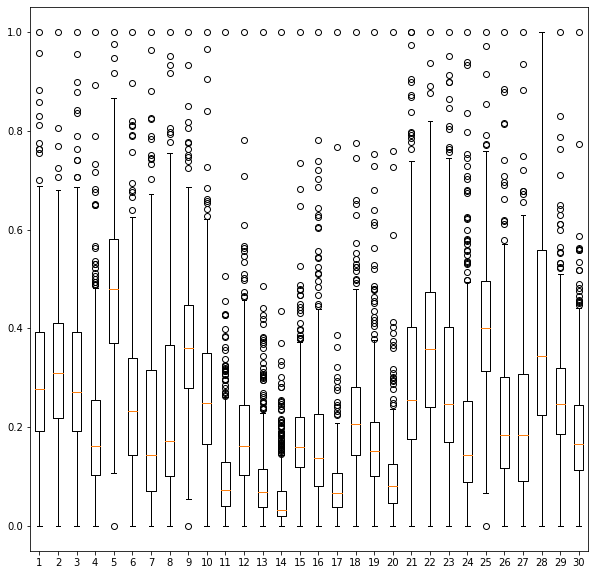

In [ ]:
fig = plt.figure(figsize=[10,10])
plt.boxplot(x_train_sik)
print('')

In [ ]:
# 표준화(Standardization)
# 데이터를 0을 중심으로 양쪽으로 데이터를 분산시키는 방법
# 표준화 식 = (측정값 - 평균) / 표준편차


xMean = x_train.mean(axis=0)  # x_train의 평균
xStd = x_train.std(axis=0)    # x_train의 표준편차

x_train_s = (x_train - xMean) / xStd
x_test_s = (x_test - xMean) / xStd

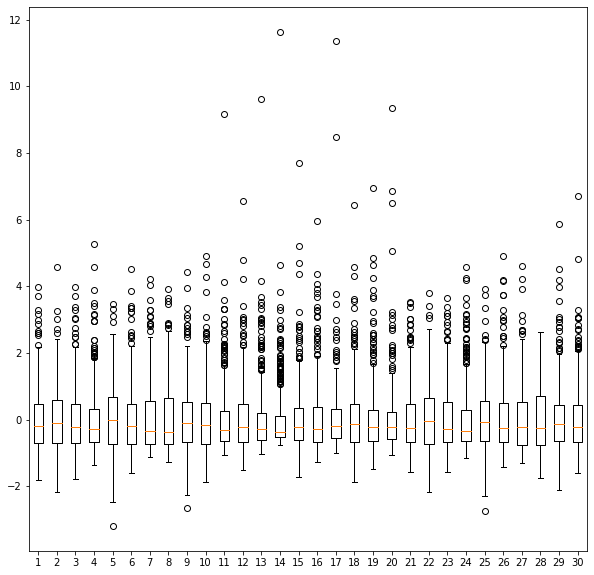

In [ ]:
fig = plt.figure(figsize=[10,10])
plt.boxplot(x_train_s)
print('')

In [ ]:
# 정규화한 것 학습시켜서 모델평가 시키기
m = SVC().fit(x_train_sik, y_train)

trainScore = m.score(x_train_sik, y_train)
testScore = m.score(x_test_sik, y_test)

print(trainScore, testScore)

0.9835680751173709 0.958041958041958


In [ ]:
# 표준화한 것 학습시켜서 모델평가 시키기
m1 = SVC().fit(x_train_s, y_train)

trainScore1 = m1.score(x_train_s, y_train)
testScore1 = m1.score(x_test_s, y_test)

print(trainScore1, testScore1)

0.9882629107981221 0.958041958041958


In [ ]:
predict = m1.predict(x_test_s)
print(y_test)
print()
print(predict)

[0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1
 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1]

[0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1
 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1
 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1]


In [ ]:
# test의 정답지와 test의 시험지 예측값이 서로 맞지 않는 것을 찾아내기 위해서
np.where(y_test != predict)

(array([ 58,  79,  81, 111, 116, 125]),)

# SVM의 옵션 : C, gamma

사용자가 직접 세팅
1. C : data 샘플들이 다른 클래스에 놓이는 것을 허용하는 정도를 결정 (모델을 최적화 하는데에 의의)
2. gamma : 결정하는 경계의 곡률을 결정 (하나의 데이터가 영향력을 행사하는 거기를 결정)
* 두 값이 모두 커지면 커질수록 알고리즘의 복잡도는 증가

C : 분류를 하는데에 있어서 오차를 허용하는 범위(마진)를 조정

C값에 따라서 정확도가 바뀜

C값이 커지면 허용하는 오차의 개수가 작아지고 => 마진이 좁아지게 되는 현상

In [ ]:
C = [0.1, 1, 10, 100]
gamma = [0.001, 0.01, 0.1, 10]
s_train = []
s_test = []

for c in C:
  s1 = []
  s2 = []
  for g in gamma:
    model = SVC(C=c, gamma=g)
    model.fit(x_train_s, y_train) # 학습
    predict = model.predict(x_test_s) # 예측
    s1.append(model.score(x_train_s, y_train)) #모델평가
    s2.append(model.score(x_test_s, y_test))
  s_train.append(s1)
  s_test.append(s2)

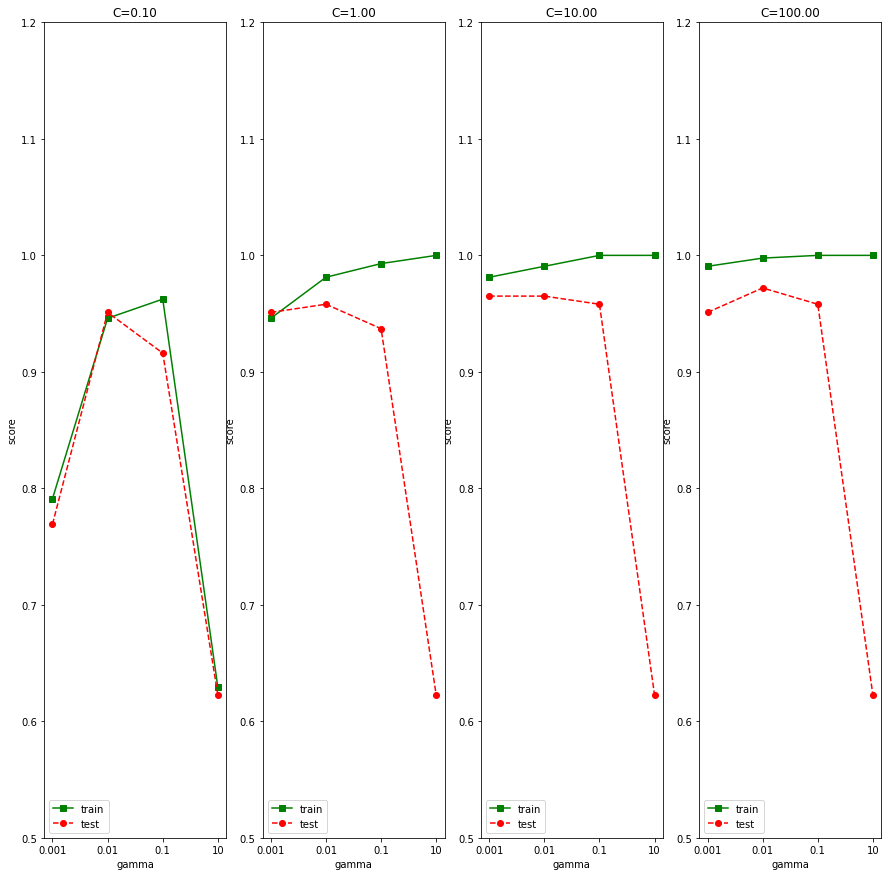

In [ ]:
fig = plt.figure(figsize=[15,15])
for i in range(len(C)):
  plt.subplot(1, len(C), i + 1) # subplot(행,열,인덱스)
  plt.plot(s_train[i],'gs-', label='train') # 학습 데이터
  plt.plot(s_test[i],'ro--', label='test') # 빨간색 동그라미 실선, 테스트 데이터
  plt.title('C=%.2f' % (C[i]))
  plt.xticks(range(len(gamma)), gamma)
  plt.ylim(0.5, 1.2)
  plt.xlabel('gamma')
  plt.ylabel('score')
  plt.legend(loc='lower left')